In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Загрузим dataset
В данном dataset будем рассматривать бинарную классификацию по целевой фиче Response
Суть задачи в том, чтобы определить возможный отток клиентов

In [220]:
data = pd.read_csv('WA.csv')

In [221]:
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [223]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Удалим Customer так как он является аналогом id для клиента

In [224]:
data.drop('Customer', axis=1, inplace=True)

Посмотрим на категориальные фичи и их значения

In [225]:
uni_data = {}
for col in data.columns:
    if data[col].dtypes == 'object':
        uni_data[col] = data[col].unique().tolist()
for i in uni_data.items():
    print(i)

('State', ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'])
('Response', ['No', 'Yes'])
('Coverage', ['Basic', 'Extended', 'Premium'])
('Education', ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'])
('Effective To Date', ['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11', '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11', '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11', '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11', '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11', '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11', '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11', '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11', '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11', '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'])
('EmploymentStatus', ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'])
('Gender', ['F', 'M'])
('Lo

Посмотрим на целевую переменную

<Axes: >

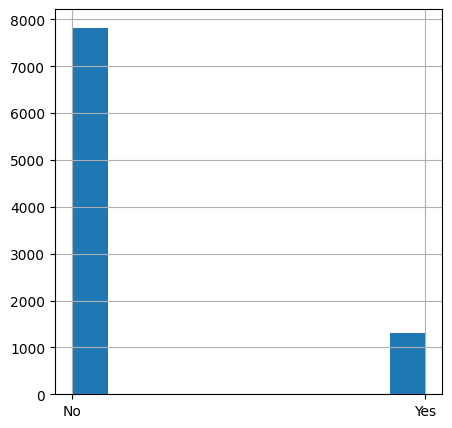

In [226]:
plt.rcParams['figure.figsize'] = (5, 5)
data['Response'].hist()

Можно заметить явный дисбаланс

Соберем пары категориальных фич с целевой фичей, чтобы посмотреть гистограммы

In [227]:
pair_with_target = []

for col in data.columns:
    sub_lst = ['Response']
    if data[col].dtypes == 'object':
        sub_lst.append(col)
        pair_with_target.append(sub_lst)
        if len(sub_lst) >= 2:
            continue
pair_with_target.pop(1)
pair_with_target.pop(3)
pair_with_target

[['Response', 'State'],
 ['Response', 'Coverage'],
 ['Response', 'Education'],
 ['Response', 'EmploymentStatus'],
 ['Response', 'Gender'],
 ['Response', 'Location Code'],
 ['Response', 'Marital Status'],
 ['Response', 'Policy Type'],
 ['Response', 'Policy'],
 ['Response', 'Renew Offer Type'],
 ['Response', 'Sales Channel'],
 ['Response', 'Vehicle Class'],
 ['Response', 'Vehicle Size']]

Здесь можно посмотреть соотношения с целевой фичей

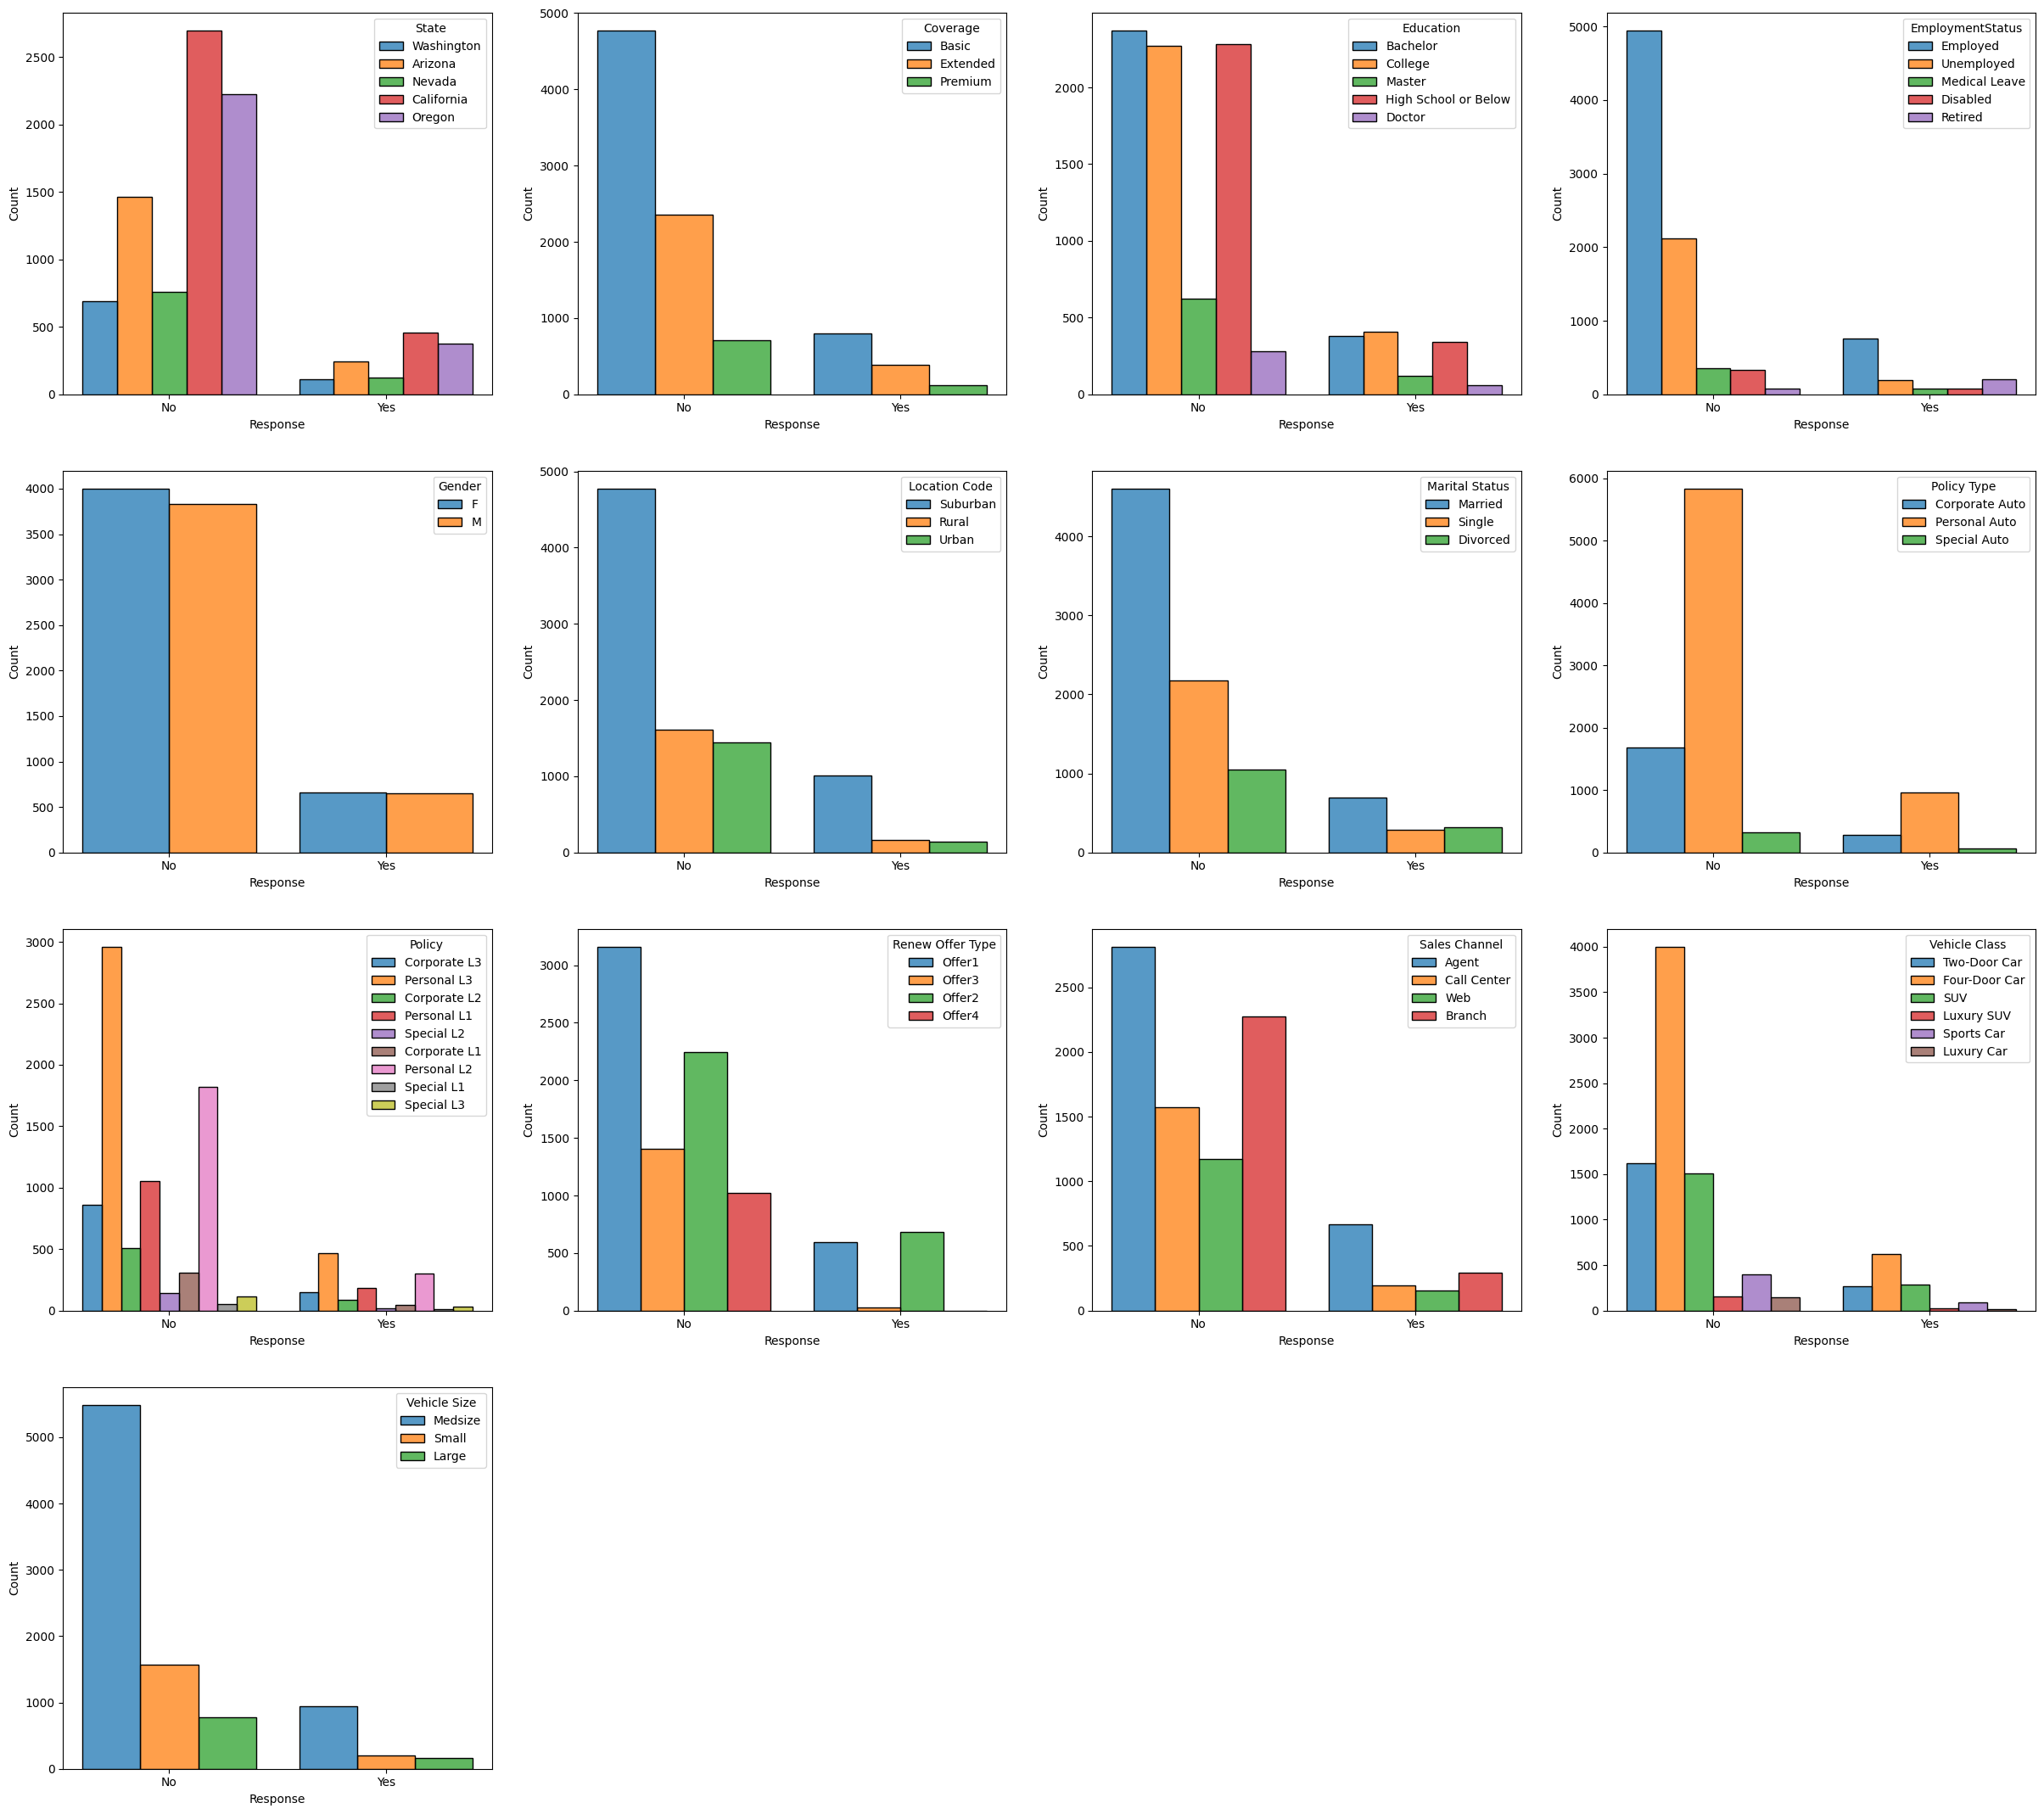

In [228]:
plt.rcParams['figure.figsize'] = (30, 90)

len_lst = len(pair_with_target)
count = 1
for g in pair_with_target:
    col_1 = g[0]
    col_2 = g[1]
    plt.subplot(len_lst, 4, count)
    sns.histplot(data=data, x=col_1, hue=col_2, multiple='dodge', shrink=.8)
    count += 1

Можно заметить, что на Offer3 и Offer4 практически нет оттока

Посмотрим на пары с некатегориальными фичами с целевой фичей

In [229]:
pair_with_target = []

for col in data.columns:
    sub_lst = ['Response']
    if data[col].dtypes != 'object':
        sub_lst.append(col)
        pair_with_target.append(sub_lst)
        if len(sub_lst) >= 2:
            continue
pair_with_target.pop(1)
pair_with_target.pop(3)
pair_with_target

[['Response', 'Customer Lifetime Value'],
 ['Response', 'Monthly Premium Auto'],
 ['Response', 'Months Since Last Claim'],
 ['Response', 'Number of Open Complaints'],
 ['Response', 'Number of Policies'],
 ['Response', 'Total Claim Amount']]

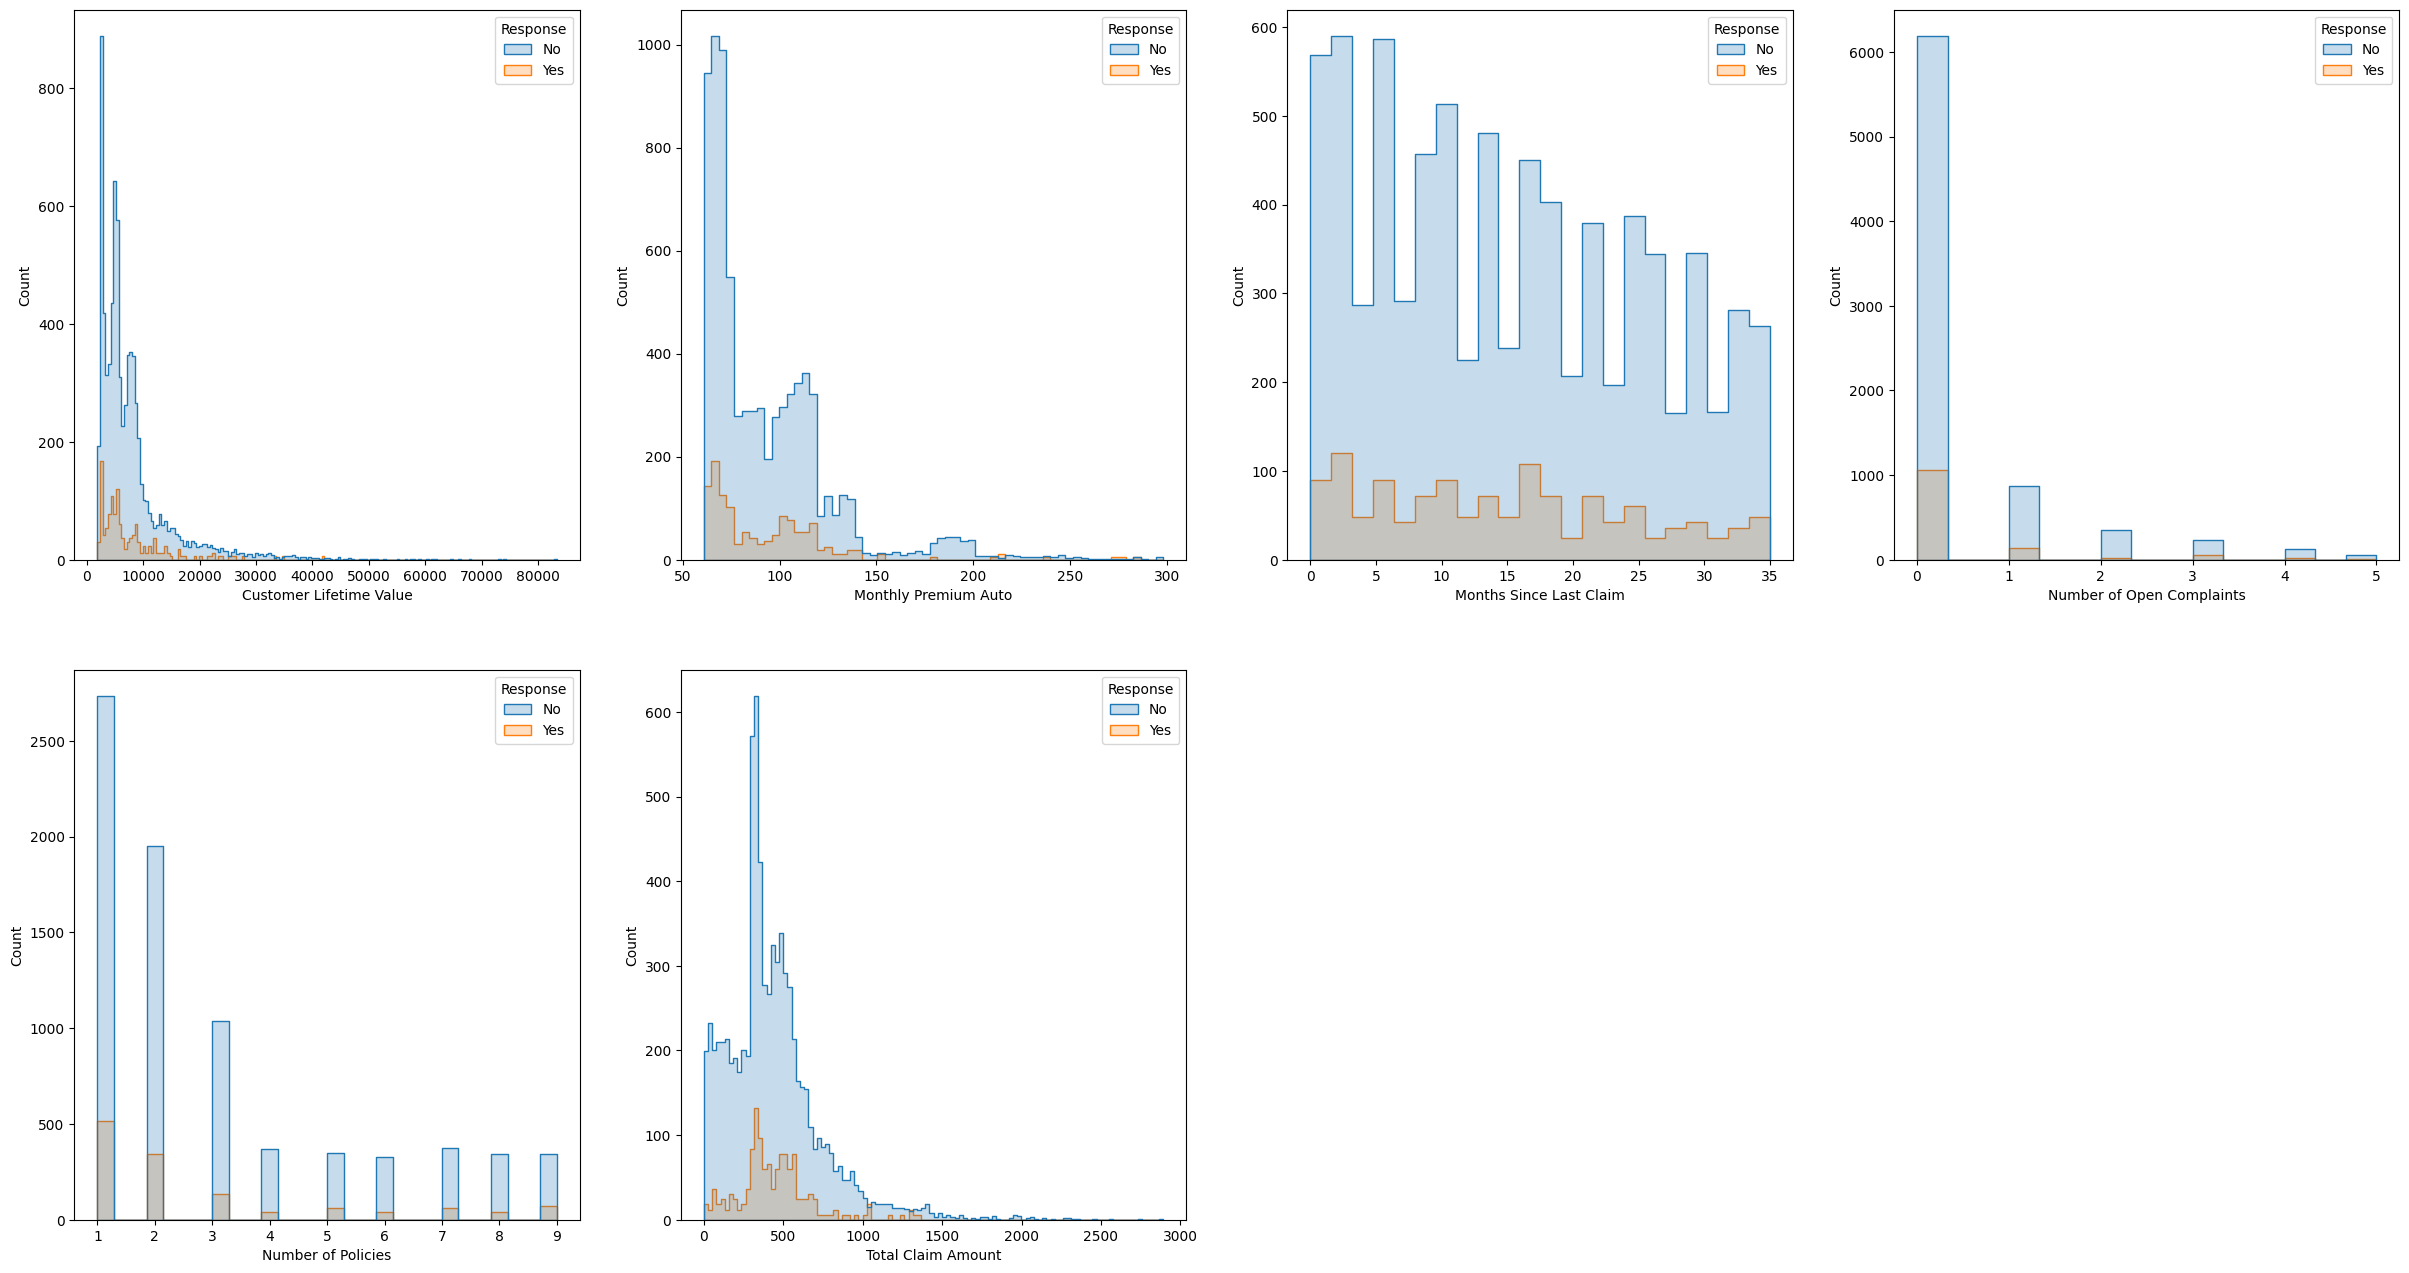

In [230]:
plt.rcParams['figure.figsize'] = (30, 50)

len_lst = len(pair_with_target)
count = 1
for g in pair_with_target:
    col_1 = g[0]
    col_2 = g[1]
    plt.subplot(len_lst, 4, count)
    sns.histplot(data=data, x=col_2, hue=col_1, element='step')
    count += 1

# PFE

Воспользуемся LabelEncoder, для работы с категориальынми переменными

In [232]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

In [233]:
data.head(5)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1


Посмотрим на heatmap

<Axes: >

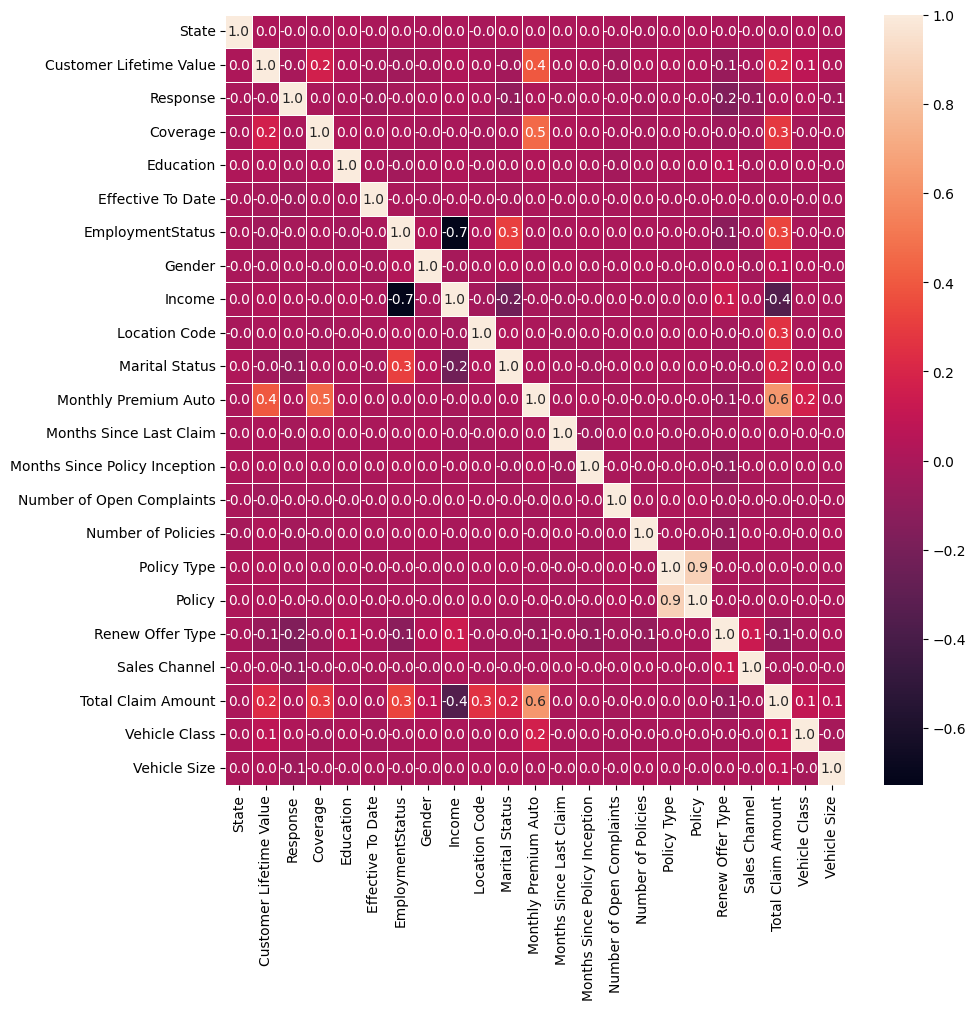

In [234]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(data=data.corr(method='pearson'), annot=True, linewidths=.5, fmt='.1f')

Удалим сильно скоррелированные фичи

In [235]:
data.drop(['Policy Type', 'Income'], axis=1, inplace=True)

<Axes: >

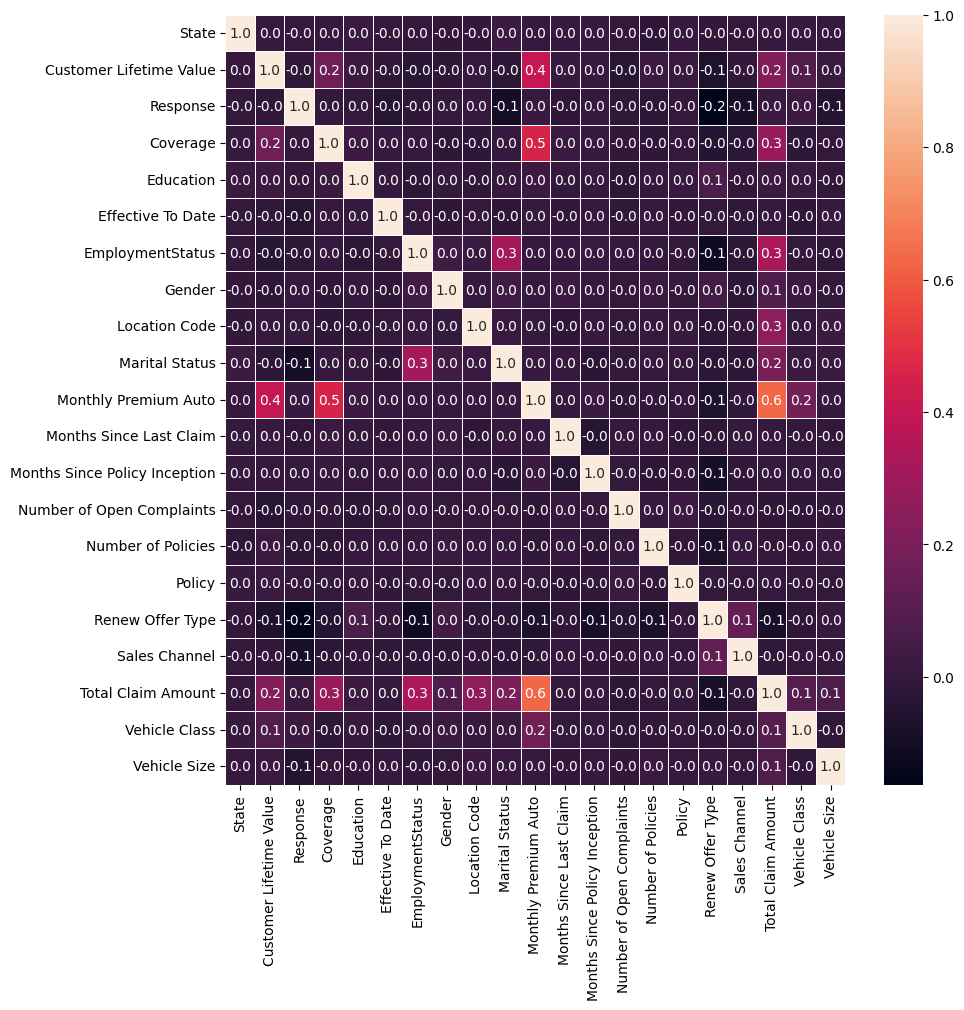

In [236]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(data=data.corr(method='pearson'), annot=True, linewidths=.5, fmt='.1f')

Разобьем данные на train, test

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Response', axis=1),
                                                    data['Response'], 
                                                    train_size=0.3, 
                                                    stratify=data['Response'], 
                                                    random_state=0)

# ML

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

Проведем шкалирование

In [239]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Сделаем обучение моделей из коробки и посмотрим на метрики

In [240]:
gbc = GradientBoostingClassifier()

gbc_model = gbc.fit(X_train_scaled, y_train)

gbc_pred = gbc.predict(X_train_scaled)

acc = accuracy_score(gbc_pred, y_train)
pre = precision_score(gbc_pred, y_train)
rec = recall_score(gbc_pred, y_train)
f1 = f1_score(gbc_pred, y_train)

print(f"accuracy_score: {acc}")
print(f"precision_score: {pre}")
print(f"recall_score: {rec}")
print(f"f1_score: {f1}")

accuracy_score: 0.9047445255474452
precision_score: 0.35459183673469385
recall_score: 0.9455782312925171
f1_score: 0.5157699443413729


In [241]:
scores = cross_val_score(gbc, X_train_scaled, y_train, cv=5, scoring='f1')

print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.28571429 0.44444444 0.51376147 0.44230769 0.35051546]
mean 0.4073486708547713
std 0.07993353492906353
Точность: 0.407 (0.080)


In [242]:
xgb = XGBClassifier()

xgb_model = xgb.fit(X_train_scaled, y_train)

xgb_pred = xgb.predict(X_train_scaled)

acc = accuracy_score(gbc_pred, y_train)
pre = precision_score(gbc_pred, y_train)
rec = recall_score(gbc_pred, y_train)
f1 = f1_score(gbc_pred, y_train)

print(f"accuracy_score: {acc}")
print(f"precision_score: {pre}")
print(f"recall_score: {rec}")
print(f"f1_score: {f1}")

accuracy_score: 0.9047445255474452
precision_score: 0.35459183673469385
recall_score: 0.9455782312925171
f1_score: 0.5157699443413729


In [243]:
scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='f1')

print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.82352941 0.77027027 0.82894737 0.83660131 0.85106383]
mean 0.8220824374865611
std 0.027511598863328497
Точность: 0.822 (0.028)


In [244]:
ctb = CatBoostClassifier()

ctb_model = ctb.fit(X_train_scaled, y_train)

ctb_pred = ctb.predict(X_train_scaled)

acc = accuracy_score(gbc_pred, y_train)
pre = precision_score(gbc_pred, y_train)
rec = recall_score(gbc_pred, y_train)
f1 = f1_score(gbc_pred, y_train)

print(f"accuracy_score: {acc}")
print(f"precision_score: {pre}")
print(f"recall_score: {rec}")
print(f"f1_score: {f1}")

Learning rate set to 0.015844
0:	learn: 0.6828702	total: 5.09ms	remaining: 5.08s
1:	learn: 0.6708534	total: 7.78ms	remaining: 3.88s
2:	learn: 0.6560306	total: 11.2ms	remaining: 3.71s
3:	learn: 0.6423656	total: 14ms	remaining: 3.49s
4:	learn: 0.6282353	total: 16.4ms	remaining: 3.26s
5:	learn: 0.6200344	total: 18.9ms	remaining: 3.13s
6:	learn: 0.6069050	total: 21.3ms	remaining: 3.02s
7:	learn: 0.5951196	total: 23.7ms	remaining: 2.93s
8:	learn: 0.5863860	total: 26.2ms	remaining: 2.88s
9:	learn: 0.5760385	total: 29.2ms	remaining: 2.89s
10:	learn: 0.5678437	total: 31.6ms	remaining: 2.84s
11:	learn: 0.5579976	total: 34.3ms	remaining: 2.82s
12:	learn: 0.5492596	total: 36.7ms	remaining: 2.78s
13:	learn: 0.5432501	total: 39ms	remaining: 2.74s
14:	learn: 0.5360413	total: 41.5ms	remaining: 2.73s
15:	learn: 0.5273412	total: 44.3ms	remaining: 2.72s
16:	learn: 0.5219788	total: 46.1ms	remaining: 2.67s
17:	learn: 0.5162175	total: 48.6ms	remaining: 2.65s
18:	learn: 0.5099376	total: 51ms	remaining: 2.63

In [245]:
scores = cross_val_score(ctb, X_train_scaled, y_train, cv=5, scoring='f1')

print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Learning rate set to 0.014404
0:	learn: 0.6838093	total: 2.86ms	remaining: 2.85s
1:	learn: 0.6722979	total: 9.01ms	remaining: 4.49s
2:	learn: 0.6585247	total: 12.2ms	remaining: 4.05s
3:	learn: 0.6456956	total: 14.8ms	remaining: 3.67s
4:	learn: 0.6325928	total: 17.2ms	remaining: 3.41s
5:	learn: 0.6249139	total: 19.4ms	remaining: 3.21s
6:	learn: 0.6125183	total: 21.7ms	remaining: 3.08s
7:	learn: 0.6011125	total: 24.1ms	remaining: 2.98s
8:	learn: 0.5927385	total: 26.4ms	remaining: 2.9s
9:	learn: 0.5855397	total: 28.7ms	remaining: 2.84s
10:	learn: 0.5775344	total: 30.9ms	remaining: 2.78s
11:	learn: 0.5679575	total: 33.1ms	remaining: 2.72s
12:	learn: 0.5592133	total: 35.5ms	remaining: 2.69s
13:	learn: 0.5533454	total: 37.9ms	remaining: 2.67s
14:	learn: 0.5461254	total: 40.3ms	remaining: 2.65s
15:	learn: 0.5373172	total: 42.7ms	remaining: 2.62s
16:	learn: 0.5324254	total: 44.4ms	remaining: 2.57s
17:	learn: 0.5267929	total: 47.1ms	remaining: 2.57s
18:	learn: 0.5206082	total: 50.3ms	remaining:

In [246]:
lgbm = LGBMClassifier()

lgbm_model = lgbm.fit(X_train_scaled, y_train)

lgbm_pred = lgbm.predict(X_train_scaled)

acc = accuracy_score(gbc_pred, y_train)
pre = precision_score(gbc_pred, y_train)
rec = recall_score(gbc_pred, y_train)
f1 = f1_score(gbc_pred, y_train)

print(f"accuracy_score: {acc}")
print(f"precision_score: {pre}")
print(f"recall_score: {rec}")
print(f"f1_score: {f1}")

[LightGBM] [Info] Number of positive: 392, number of negative: 2348
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 2740, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143066 -> initscore=-1.790057
[LightGBM] [Info] Start training from score -1.790057
accuracy_score: 0.9047445255474452
precision_score: 0.35459183673469385
recall_score: 0.9455782312925171
f1_score: 0.5157699443413729


In [247]:
scores = cross_val_score(lgbm, X_train_scaled, y_train, cv=5, scoring='f1')

print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[LightGBM] [Info] Number of positive: 313, number of negative: 1879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142792 -> initscore=-1.792292
[LightGBM] [Info] Start training from score -1.792292
[LightGBM] [Info] Number of positive: 313, number of negative: 1879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142792 -> initscore=-1.792292
[LightGBM] [Info] Start training from score -1.792292
[LightGBM] [Info] Numb

Побробуем улучшить метрики

Воспользуемся RandomizedSearchCV для тюнинга параметров

In [282]:
from sklearn.model_selection import RandomizedSearchCV

gbc_param = {
    "n_estimators": range(100, 700, 50),
    "min_samples_leaf": [.01, .1, .3, .5, .99],
    "max_depth": range(3, 50, 1),
    "max_leaf_nodes": [2, 6, 17, 51, 150],
}
xgb_param = {
    "max_depth": range(3, 50, 1),
    "n_estimators": range(100, 700, 50),
    "learning_rate": [.05, .075, .1, .15, .2]
}
ctb_param = {
    "iterations": range(100, 500, 100),
    "learning_rate": [.05, .075, .1, .15, .2],
    "depth": range(3, 10, 1)  
}
lgbm_param = {
    "n_estimators": range(100, 700, 50),
    "max_depth": [3, 50, 1],
    "num_leaves": range(1, 31, 1)
}

In [252]:
def rand_search_cv(grad_boost, param):
    rand_search = RandomizedSearchCV(grad_boost, param, cv=5, scoring='f1', verbose=1)
    rand_search.fit(X_train_scaled, y_train)

    print("Best CV score: {:.3f}, best CV k: {}".format(
        rand_search.best_score_, rand_search.best_estimator_)
    )

    print("Best Hyperparameters:", rand_search.best_params_)


    test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
    print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

In [257]:
rand_search_cv(gbc, gbc_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best CV score: 0.812, best CV k: GradientBoostingClassifier(max_depth=4, max_leaf_nodes=17,
                           min_samples_leaf=0.01, n_estimators=650)
Best Hyperparameters: {'n_estimators': 650, 'min_samples_leaf': 0.01, 'max_leaf_nodes': 17, 'max_depth': 4}
Resulting test score: 0.857


In [258]:
rand_search_cv(xgb, xgb_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best CV score: 0.840, best CV k: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=550, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best Hyperparameters: {'n_estimators': 550, 'max_depth': 12, 'learning_rate': 0.15}
Resulting test score: 0.864


In [271]:
rand_search_cv(ctb, ctb_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6044534	total: 15.9ms	remaining: 4.76s
1:	learn: 0.5234446	total: 20.5ms	remaining: 3.05s
2:	learn: 0.4534455	total: 25.2ms	remaining: 2.49s
3:	learn: 0.4129420	total: 29.2ms	remaining: 2.16s
4:	learn: 0.3915373	total: 33.1ms	remaining: 1.95s
5:	learn: 0.3740690	total: 35.5ms	remaining: 1.74s
6:	learn: 0.3364290	total: 39.5ms	remaining: 1.65s
7:	learn: 0.3162207	total: 44.1ms	remaining: 1.61s
8:	learn: 0.3021406	total: 47.9ms	remaining: 1.55s
9:	learn: 0.2906205	total: 51.7ms	remaining: 1.5s
10:	learn: 0.2741620	total: 56.1ms	remaining: 1.47s
11:	learn: 0.2655388	total: 60.6ms	remaining: 1.46s
12:	learn: 0.2537559	total: 64.6ms	remaining: 1.43s
13:	learn: 0.2442337	total: 68.4ms	remaining: 1.4s
14:	learn: 0.2361667	total: 72.4ms	remaining: 1.38s
15:	learn: 0.2310948	total: 76.7ms	remaining: 1.36s
16:	learn: 0.2274577	total: 80.7ms	remaining: 1.34s
17:	learn: 0.2198911	total: 84.6ms	remaining: 1.32s
18:	learn: 0.21

In [283]:
rand_search_cv(lgbm, lgbm_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 313, number of negative: 1879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142792 -> initscore=-1.792292
[LightGBM] [Info] Start training from score -1.792292
[LightGBM] [Info] Number of positive: 313, number of negative: 1879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142792 -> initscore=-1.792292
[LightGBM] [Inf

После настроек параметров наилучший результат показал Catboost